In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import Callable

import plotly.express as px
import plotly.graph_objects as go

import sys; sys.path.append('../src/')
import one_dim_search.dichotomy as dichot
import one_dim_search.fib as fib
import one_dim_search.linear as lin
import one_dim_search.golden as gold
from descent.grad import gradient_descent, get_constant_step_chooser

from more_itertools import last

from IPython.display import Image

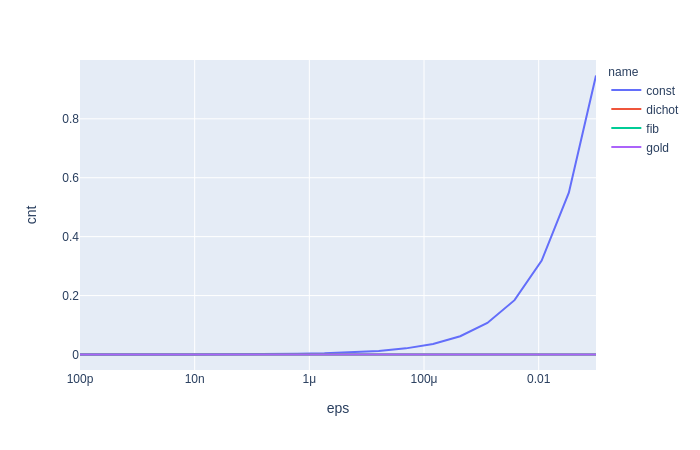

In [6]:
def generic_step_chooser(one_dim_search: Callable):
    def step_chooser(f, x_k, cur_grad):
        phi = lambda h: f(x_k - h * cur_grad)
        l, r = lin.search(0, delta=0.01, f=phi, eps=1e-3, multiplier=2)
        l, r = one_dim_search(l, r, f=phi, eps=1e-5)
        return (l + r) / 2
    return step_chooser

step_choosers = {
    'const': get_constant_step_chooser(1e-3),
    'dichot': generic_step_chooser(dichot.search),
    'fib': generic_step_chooser(fib.search), 
    'gold': generic_step_chooser(gold.search),
}

def f(p): return p[0] ** 2 + p[1] ** 2

def f_grad(p): return np.array([2 * p[0], 2 * p[1]])

# data = []
# for name, chooser in step_choosers.items():
#     for eps in np.logspace(-1, -10, 20):
#         cnt, res = gradient_descent(f=f, f_grad=f_grad, eps=eps, start=np.array([3, 2]), step_chooser=chooser)
#         data.append({
#             'name': name,
#             'eps': eps,
#             'cnt': cnt
#         })
        
# px.line(data, x='eps', log_x=True, y='cnt', color='name')
Image("pics/descent_grad_steps.png")